In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import random

In [2]:
def pps(n,ND) :
    P=n*100/ND
    PP= "{:.2f}".format(P)
    print("\r",end="")
    print("processes",PP,"% completed:   ",end="")
    i=50*n/ND
    a=50-int(i)
    b=(int(i)+1)*"🟩"
    c=(a-1)*"⬜️"
    print(b,end="")
    print(c, end="")
    if n==ND:
        print("\r","computing successfully completed!   ",50*"🟦")

In [3]:
def initial_condition(I0):
    G=nx.read_gpickle('Graph.gpickle')
    for n_0 in G.nodes:
        G.nodes[n_0]['x']='s'
        G.nodes[n_0]['tpe']=0
        if random.random()<I0:
            G.nodes[n_0]['x']='i'
    return G

In [4]:
def Count_nodes(Graph):
    enode=[]
    inode=[]

    for n_1 in Graph.nodes:
        if Graph.nodes[n_1]['x']=='e':
            enode.append(n_1)  
        if Graph.nodes[n_1]['x']=='i':
            inode.append(n_1)  

    return (inode,enode)

In [5]:
def SEIR_dynamic(I0,beta,gamma,t_e,P1):

    G = initial_condition(I0)

    for dp in range(80):

        (inode,enode)= Count_nodes(Graph=G)

        for n_2 in G.nodes:
            if G.nodes[n_2]['x']=='s' and random.random()<P1:
                G.nodes[n_2]['x']='v'
            if G.nodes[n_2]['x']=='e':
                G.nodes[n_2]['tpe']+=1
            if G.nodes[n_2]['x']=='q':
                G.nodes[n_2]['tpq']+=1
        for n_3 in enode:
            if G.nodes[n_3]['tpe']>=np.random.poisson(t_e,size=1)[0]:
                G.nodes[n_3]['x']='i'
        for n_6 in inode:
            if random.random()<gamma:
                G.nodes[n_6]['x']='r'
            for n_7 in G.adj[n_6]:
                if ((G.nodes[n_7]['x']=='s') and (random.random()<beta)):
                    G.nodes[n_7]['x']='e'

    rnum=0
    for i in G.nodes:
        if G.nodes[i]['x']=='r':
            rnum+=1
    return rnum

In [6]:
P1_list=np.linspace(0,0.2,50)
beta_list=np.linspace(0,1,50)
rdata=np.zeros((50,50,20))
rmean=np.zeros((50,50))
m=0
for p in P1_list:
    n=0
    for b in beta_list:
        for i in range(20):
            rdata[m][n][i]=SEIR_dynamic(I0= 0.01,beta= b,gamma= 1,t_e= 5,P1= p)
        rmean[m][n]=np.mean(rdata[m][n])
        n+=1
    m+=1
    pps(m,50)

 computing successfully completed!    🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦


<ipython-input-7-28d99fb4176f>:2: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  c=plt.pcolormesh(beta_list,P1_list,rmean)


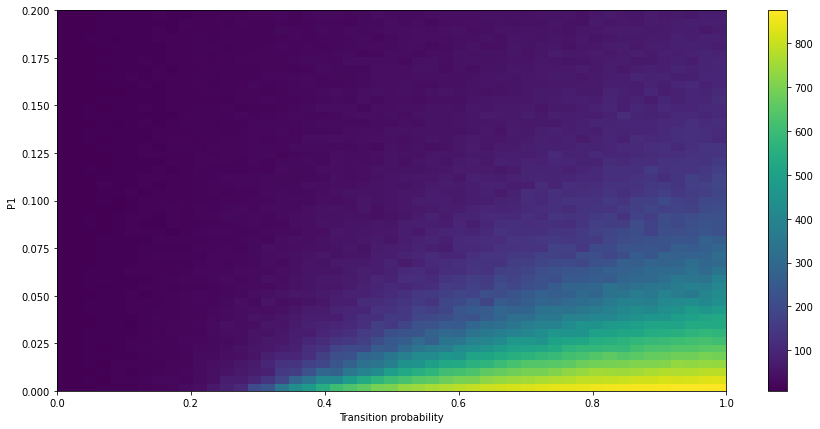

In [7]:
plt.figure(figsize=(15,7))
c=plt.pcolormesh(beta_list,P1_list,rmean)
plt.ylabel('P1')
plt.xlabel('Transition probability')
plt.colorbar(c)
plt.savefig('Fig1-2')

In [8]:
np.save('1-2-(50-50-20).npy',rdata)